import simulation broker and vehicle generator

In [1]:
import sys
sys.path.append('../')
import components
import matplotlib.pyplot as plt
import numpy as np

# simulation broker
path_Sim = "../test_data/beam1/beam1-0.csv"
dtype_Sim = {
       'time': 'int64', 'type': 'category', 'vehicle': 'int64', 'parkingTaz': 'category','chargingPointType': 'category', 
       'primaryFuelLevel': 'float64', 'mode': 'category', 'currentTourMode': 'category', 'vehicleType': 'category', 
       'arrivalTime': 'float64', 'departureTime': 'float64', 'linkTravelTime': 'string', 'primaryFuelType': 'category', 
       'parkingZoneId': 'category','duration': 'float64' 
        }
SimBroker = components.SimBroker(path_Sim, dtype_Sim)

# vehicle generator
path_DataBase = "../test_data/vehicleFiles/vehicletypes-Base_2035_20210204_updated.csv"
VehicleGenerator = components.VehicleGenerator(path_Sim, dtype_Sim, path_DataBase)

set up simulation

In [2]:
timestep = 1* 60
N = 10
times = timestep * np.arange(0,N+1)
SimBroker.reset()
i = 0
slice = []

press this to load new timestep

actual time:  19063
Vehicle with the following properties: 
VehicleId: 645747 VehicleType: ev-L1-0-to-50000-LowTech-2035-SUV-BEV_300_XFC Arrival: 19021 Desired End Time: 19870 Vehicle Energy: 31.770511582714573 Desired Energy: 67.14551158271458 SOC: 0.37842804588336876 Maximal Energy: 83.95390333333333 Max Charging Power: 400.0


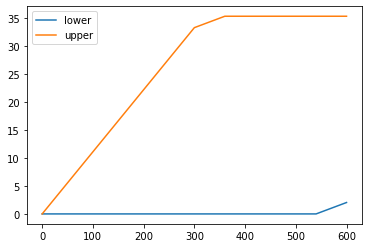

In [24]:
again = True
while again and i< len(slice):
    if slice.iloc[i]["type"] == "ChargingPlugInEvent":
        print('actual time: ', SimBroker.t_act)
        vehicle = VehicleGenerator.generateVehicleSO(slice.iloc[i])
        print(vehicle)
        again = False

        traj_lower, traj_upper = vehicle.get_charging_trajectories(SimBroker.t_act, timestep, N=N, maxPowerPlug=float('inf'))
        plt.plot(times, traj_lower, label = "lower")
        plt.plot(times, traj_upper, label = "upper")
        plt.legend()
    i+=1
if i >= len(slice):
    slice = SimBroker.step(timestep)
    i = 0
    print("loaded new slice")
    print('actual time: ', SimBroker.t_act)
# calculate trajectory

In [7]:
print(type(traj_lower))

<class 'list'>
